In [52]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Analysis Tasks 1:Import the three datasets

In [2]:
# Importing movies.dat
movie_location = r'C:\\Business Analytics\\Python Programing\\Projects\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\movies.dat'
headers =  ["MovieID","Title","Genres"]

In [3]:
df_movie = pd.read_csv(movie_location, header=None, names=headers, na_values="?",sep='::',engine='python' )
df_movie.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Splitting title and release Year in separate columns in df_movies dataframe
df_movie['Year'] = df_movie.Title.str.extract("\((\d{4})\)", expand=True)

In [5]:
# Removing Year with brackets from the 'Title' column
df_movie.Title = df_movie.Title.str[:-7]
df_movie.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [6]:
df_movie.dtypes

MovieID     int64
Title      object
Genres     object
Year       object
dtype: object

In [7]:
# Converting year from categorical to numerical.
df_movie['Year']=df_movie['Year'].astype(int)
df_movie.dtypes

MovieID     int64
Title      object
Genres     object
Year        int32
dtype: object

In [8]:
# Importing ratings.dat
ratings_location = r'C:\\Business Analytics\\Python Programing\\Projects\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\ratings.dat'
headers =  ["UserID","MovieID","Rating","Timestamp"]
df_ratings = pd.read_csv(ratings_location, header=None, names=headers, na_values="?",sep='::',engine='python' )
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
# Modify rating Timestamp format (from seconds to datetime year)
df_ratings.Timestamp = pd.to_datetime(df_ratings.Timestamp, unit='s')
df_ratings.Timestamp = df_ratings.Timestamp.dt.year
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000
1,1,661,3,2000
2,1,914,3,2000
3,1,3408,4,2000
4,1,2355,5,2001


In [10]:
df_ratings.dtypes

UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object

In [11]:
# Importing users.dat
users_location = r'C:\\Business Analytics\\Python Programing\\Projects\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\users.dat'
headers =  ["UserID","Gender","Age","Occupation","Zipcode"]
df_users = pd.read_csv(users_location, header=None, names=headers, na_values="?",sep='::',engine='python' )
df_users.head()

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


# Analysis Task 2: Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

In [12]:
movie_rating = pd.merge(df_movie,df_ratings,on='MovieID')

In [13]:
movie_rating=movie_rating.drop(labels=['Genres','Timestamp','Year'],axis=1)

In [14]:
# Merging movies+ratings+users = [Masterdata]
Master_Data = pd.merge(movie_rating,df_users,on='UserID')
Master_Data = Master_Data.drop(labels='Zipcode',axis=1)

In [15]:
Master_Data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story,1,5,F,1,10
1,48,Pocahontas,1,5,F,1,10
2,150,Apollo 13,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope,1,4,F,1,10
4,527,Schindler's List,1,5,F,1,10


In [16]:
Master_Data.shape

(1000209, 7)

# Analysis Task 3.A:User Age Distribution

In [17]:
# Creating a list of (unique) MovieLens users .
userslist= Master_Data.UserID
uniqueuserslist = np.unique(userslist)
len(uniqueuserslist)

6040

In [18]:
User_IDs= []
for i in range(len(uniqueuserslist)):
        User_IDs.append((uniqueuserslist[i]))

In [19]:
User_Age= []
for i in range(len(User_IDs)):
        User_Age.append((Master_Data[Master_Data.UserID==User_IDs[i]].Age.mean()))

In [20]:
#Creating a new dataframe with  unique User_IDs & their Age.
User_ID_Age = pd.DataFrame(list(zip(User_IDs,User_Age)),columns =['UserID', 'Age']) 
User_ID_Age.head()

,UserID,Age
0,1,1.0
1,2,56.0
2,3,25.0
3,4,45.0
4,5,25.0


(array([1325.,    0., 2096., 1193.,  550.,  496.,  380.]),
 array([ 1, 19, 25, 35, 45, 50, 56, 58]),
 <a list of 7 Patch objects>)

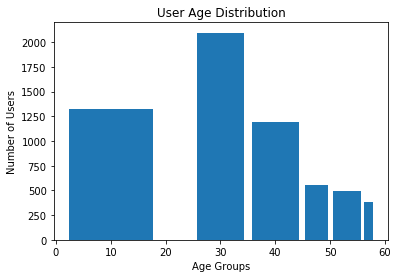

In [21]:
# Histogram of User Age Distribution
plt.xlabel('Age Groups')
plt.ylabel('Number of Users')
plt.title('User Age Distribution')
plt.hist(User_ID_Age['Age'],bins=[1, 19,25,35,45,50,56,58],alpha=1, rwidth=0.85)

# Analysis Task 3.B: User rating of the movie “Toy Story”

In [22]:
# Basic statistical description of the move :  “Toy Story”
Master_Data[Master_Data.Title=="Toy Story"].describe()

,MovieID,UserID,Rating,Age,Occupation
count,2077.0,2077.000000,2077.000000,2077.000000,2077.000000
mean,1.0,3053.819933,4.146846,27.700530,8.067886
std,0.0,1750.606746,0.852349,11.803826,6.379664
min,1.0,1.000000,1.000000,1.000000,0.000000
25%,1.0,1532.000000,4.000000,18.000000,3.000000
50%,1.0,3146.000000,4.000000,25.000000,7.000000
75%,1.0,4571.000000,5.000000,35.000000,14.000000
max,1.0,6040.000000,5.000000,56.000000,20.000000


In [23]:
# Average User rating of the movie “Toy Story”
Master_Data[Master_Data.Title=="Toy Story"].Rating.mean()

4.146846413095811

# Analysis Task 3.C: Top 25 movies by viewership rating

In [24]:
# Creating a list of (unique) movies.
movieslist= Master_Data.Title
uniquemovielist = np.unique(movieslist)
len(uniquemovielist)

3664

In [25]:
Movie_names= []
for i in range(len(uniquemovielist)):
        Movie_names.append((uniquemovielist[i]))      

In [26]:
Movie_Rating= []
for i in range(len(Movie_names)):
        Movie_Rating.append((Master_Data[Master_Data.Title==Movie_names[i]].Rating.mean()))

In [27]:
#Creating a new dataframe
Movies_MeanRating = pd.DataFrame(list(zip(Movie_names,Movie_Rating)),columns =['Title', 'Rating']) 
Movies_MeanRating.head()

,Title,Rating
0,"$1,000,000 Duck",3.027027
1,'Night Mother,3.371429
2,'Til There Was You,2.692308
3,"'burbs, The",2.910891
4,...And Justice for All,3.713568


In [28]:
Rank_Movies = Movies_MeanRating.sort_values(by='Rating',ascending=False)
Top25_Movies = Rank_Movies.head(25)
Top25_Movies

,Title,Rating
3008,Smashing Time,5.000000
3051,Song of Freedom,5.000000
2423,One Little Indian,5.000000
3437,Ulysses (Ulisse),5.000000
248,"Baby, The",5.000000
1196,Follow the Bitch,5.000000
2868,Schlafes Bruder (Brother of Sleep),5.000000
1290,"Gate of Heavenly Peace, The",5.000000
405,Bittersweet Motel,5.000000
2003,Lured,5.000000


# Analysis Task 3.D:The ratings for all the movies reviewed by for a particular user of user id = 2696

In [29]:
UserID_2696_data = Master_Data[Master_Data.UserID==2696]
UserID_2696_data = UserID_2696_data.drop(labels=['Gender','Age','Occupation'],axis=1)

#The ratings for all the movies reviewed by for a particular user of user id = 2696
UserID_2696_data

,MovieID,Title,UserID,Rating
991035,350,"Client, The",2696,3
991036,800,Lone Star,2696,5
991037,1092,Basic Instinct,2696,4
991038,1097,E.T. the Extra-Terrestrial,2696,3
991039,1258,"Shining, The",2696,4
991040,1270,Back to the Future,2696,2
991041,1589,Cop Land,2696,3
991042,1617,L.A. Confidential,2696,4
991043,1625,"Game, The",2696,4
991044,1644,I Know What You Did Last Summer,2696,2


# Analysis Task 4.A:Feature Engineering : Find out all the unique genres

In [30]:
# Categorize movies genres properly. 
genres_unique = pd.DataFrame(df_movie.Genres.str.split('|').tolist()).stack().unique()

In [31]:
# Format into DataFrame to store later
genres_unique_df = pd.DataFrame(genres_unique, columns=['genre']) 
genres_unique_df

,genre
0,Animation
1,Children's
2,Comedy
3,Adventure
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


# Analysis Task 4.B:Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [32]:
#Creating a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.##
df_movie_WithGenres = df_movie.join(df_movie.Genres.str.get_dummies()) 

In [33]:
#Droping 'Genres' column
df_movie_WithGenres=df_movie_WithGenres.drop(labels='Genres',axis=1)
df_movie_WithGenres.head()

,MovieID,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analysis Task 4.C:Determining the features affecting the ratings of any particular movie.

In [34]:
#Creating a New_Master_Data dataframe ,which includes all the columns,so that feature engg can be done from sctrach.
#Step 1
Merge1 = pd.merge(df_movie_WithGenres,df_ratings,on='MovieID')
Merge1.head(2)

,MovieID,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,UserID,Rating,Timestamp
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,5,2001
1,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,6,4,2000


In [35]:
#Creating a New_Master_Data dataframe #Step 2
New_Master_Data = pd.merge(Merge1,df_users,on='UserID')

In [36]:
#Dropping the 'Title' column as it categorical & is  clearly collinear with the 'MovieID' column.
New_Master_Data = New_Master_Data.drop(labels='Title',axis=1)
New_Master_Data.head(2)

,MovieID,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Thriller,War,Western,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode
0,1,1995,0,0,1,1,1,0,0,0,...,0,0,0,1,5,2001,F,1,10,48067
1,48,1995,0,0,1,1,0,0,0,0,...,0,0,0,1,5,2001,F,1,10,48067


In [37]:
New_Master_Data.dtypes

MovieID         int64
Year            int32
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
UserID          int64
Rating          int64
Timestamp       int64
Gender         object
Age             int64
Occupation      int64
Zipcode        object
dtype: object

In [38]:
# Label Encoding - Converting categorical 'Gender' column to numerical.After conversion here '1'= Male & '0'= Female
New_Master_Data["Gender"] = New_Master_Data["Gender"].astype('category')
New_Master_Data["Gender"] = New_Master_Data["Gender"].cat.codes
New_Master_Data.Gender.value_counts()

1    753769
0    246440
Name: Gender, dtype: int64

In [39]:
#The 'Zipcode' column couldn't be converted into integer,as it had many observations containing '-'.So here we see all those rows
New_Master_Data[New_Master_Data['Zipcode'].str.contains("-")]

,MovieID,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Thriller,War,Western,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode
22300,1,1995,0,0,1,1,1,0,0,0,...,0,0,0,293,2,2000,1,56,1,55337-4056
22301,2,1995,0,1,0,1,0,0,0,0,...,0,0,0,293,2,2001,1,56,1,55337-4056
22302,17,1995,0,0,0,0,0,0,0,1,...,0,0,0,293,4,2001,1,56,1,55337-4056
22303,34,1995,0,0,0,1,1,0,0,1,...,0,0,0,293,5,2001,1,56,1,55337-4056
22304,46,1995,0,0,0,0,0,0,0,1,...,0,0,0,293,3,2001,1,56,1,55337-4056
22305,58,1994,0,0,0,0,0,0,0,1,...,0,0,0,293,5,2000,1,56,1,55337-4056
22306,62,1995,0,0,0,0,0,0,0,1,...,0,0,0,293,5,2000,1,56,1,55337-4056
22307,82,1995,0,0,0,0,0,0,0,1,...,0,0,0,293,3,2001,1,56,1,55337-4056
22308,141,1996,0,0,0,0,1,0,0,0,...,0,0,0,293,5,2000,1,56,1,55337-4056
22309,150,1995,0,0,0,0,0,0,0,1,...,0,0,0,293,4,2001,1,56,1,55337-4056


In [40]:
# Droping Zipcode as it contains 13226 rows which cannot be converted into integers(as those zipcodes are in 
# this format-->55337-4056) i.e the column data type remains as categorical.
New_Master_Data = New_Master_Data.drop('Zipcode',axis=1)

In [41]:
# After performing a few iterations with the New_Master_Data dataset on KNN,NB,LR & RandomForest,with both scaled and unscaled
# data, I had come to a conclusion that -MovieID & UserID are the most important features in the dataset, for predicting the 
# Ratings of any particular movie.Also the columns :
# [#All the Genres,Year] change w.r.t every unique MovieID. i.e each MovieID have its unique set of Genres & Year:;Similarly
# ['Gender', 'Age', 'Occupation'] change w.r.t every unique UserID.

In [42]:
Master_Data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story,1,5,F,1,10
1,48,Pocahontas,1,5,F,1,10
2,150,Apollo 13,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope,1,4,F,1,10
4,527,Schindler's List,1,5,F,1,10


In [43]:
Master_Data.columns

Index(['MovieID', 'Title', 'UserID', 'Rating', 'Gender', 'Age', 'Occupation'], dtype='object')

In [44]:
Final_MasterData = Master_Data.drop(['Title','Gender', 'Age', 'Occupation'],axis=1)

In [45]:
Final_MasterData.shape

(1000209, 3)

In [46]:
# Defining the features and response set
X_df = Final_MasterData.drop(['Rating'],axis=1)
y_df = Final_MasterData.Rating

In [47]:
Final_MasterData.columns

Index(['MovieID', 'UserID', 'Rating'], dtype='object')

In [48]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_df, 
                                                    y_df, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [49]:
# build the k-NN model
knn = KNeighborsClassifier(n_neighbors=51,weights='distance',metric='manhattan')
knn_model = knn.fit(X_train, y_train)

In [50]:
# Predicting the Ratings of MovieIDs : 260 & 1 ,given by the UserID : 1
test = ([[260,1],[1,1]])
knn_model.predict(test)

array([4, 5], dtype=int64)

In [51]:
# The KNN ML model have predicted the Ratings as 4 & 5 for MovieIDs : 260 & 1 ,given by the UserID : 1.Here the model have 
# predicted the Ratings correctly.(After verifying it with the original dataset)